In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df["cultivar"] = data.target


In [2]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  culti

In [4]:
wine_df.shape



(178, 14)

In [18]:
# Check for missing values
null_counts = wine_df.isnull().sum()
null_counts


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


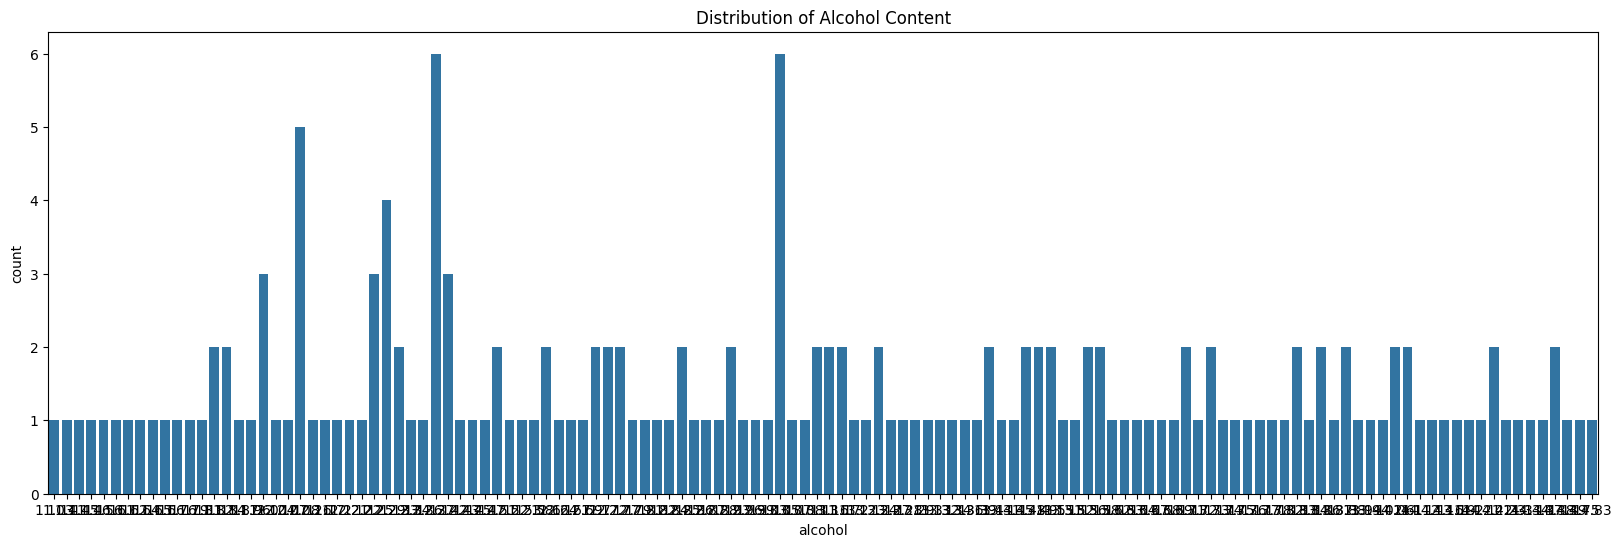

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quick bar plot of alcohol content
plt.figure(figsize=(20, 6))
sns.countplot(x='alcohol', data=wine_df)
plt.title('Distribution of Alcohol Content')
plt.show()

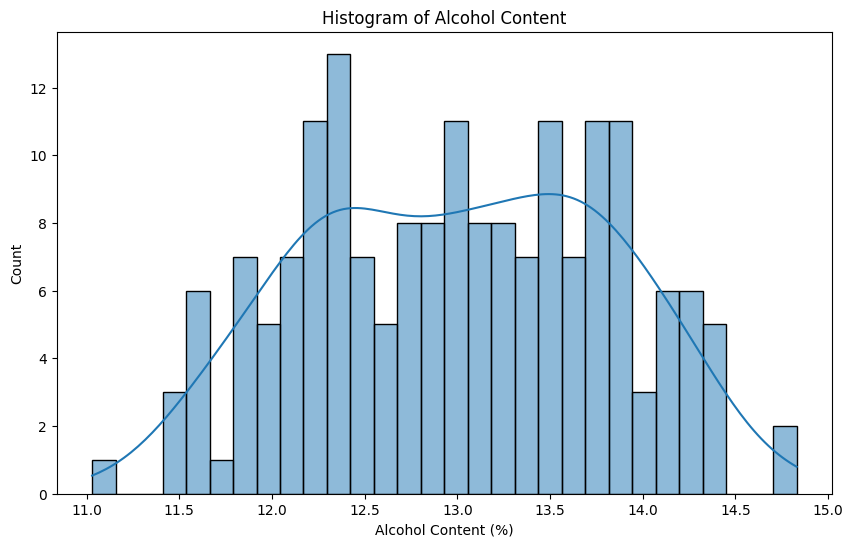

In [6]:
# Histogram of 'alcohol' content
plt.figure(figsize=(10, 6))
sns.histplot(wine_df['alcohol'], bins=30, kde=True)
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()

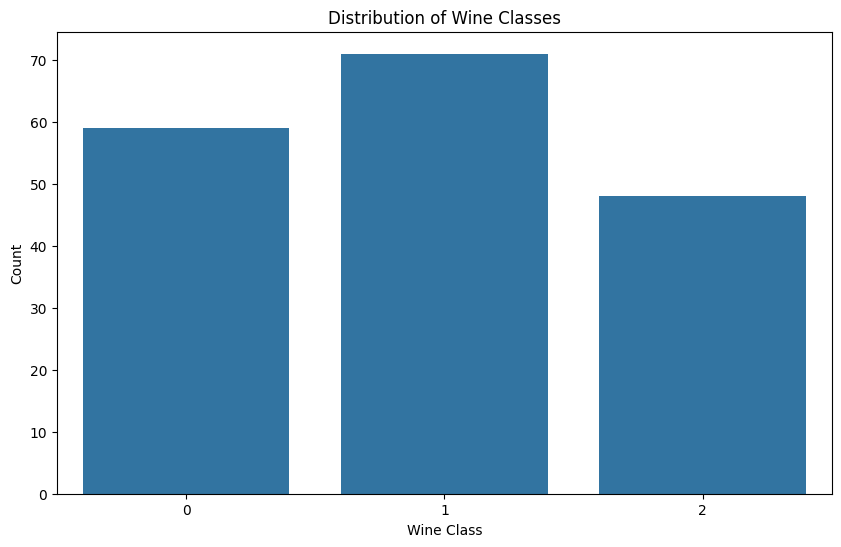

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cultivar', data=wine_df)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()


In [12]:

# Create a two-way table
pd.crosstab(wine_df['alcohol'], wine_df['cultivar'])


cultivar,0,1,2
alcohol,,,
11.03,0,1,0
11.41,0,1,0
11.45,0,1,0
11.46,0,1,0
11.56,0,1,0
...,...,...,...
14.37,1,0,0
14.38,2,0,0
14.39,1,0,0


In [13]:
allowed_features = [
    "alcohol", "malic_acid", "ash", "alcalinity_of_ash",
    "magnesium", "total_phenols", "flavanoids",
    "color_intensity", "hue", "od280/od315_of_diluted_wines",
    "proline"
]


In [14]:
correlation = (
    wine_df[allowed_features + ["cultivar"]]
    .corr()["cultivar"]
    .abs()
    .sort_values(ascending=False)
)

correlation


,cultivar
cultivar,1.000000
flavanoids,0.847498
od280/od315_of_diluted_wines,0.788230
total_phenols,0.719163
proline,0.633717
hue,0.617369
alcalinity_of_ash,0.517859
malic_acid,0.437776
alcohol,0.328222
color_intensity,0.265668


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for allowed features + target
corr_matrix = wine_df[allowed_features + ["cultivar"]].corr()


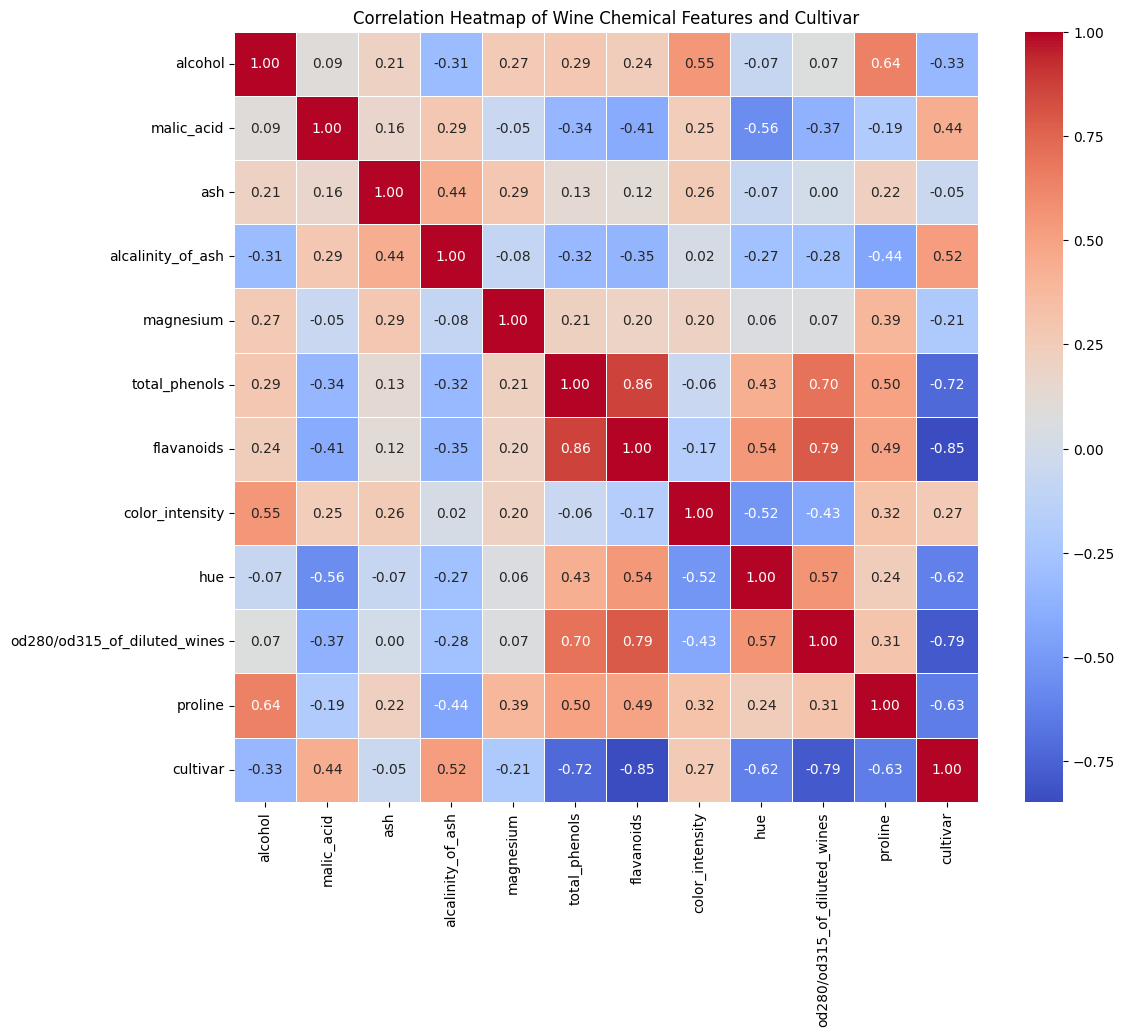

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Wine Chemical Features and Cultivar")
plt.show()


In [17]:
selected_features = [
    "flavanoids",
    "od280/od315_of_diluted_wines",
    "total_phenols",
    "proline",
    "hue",
    "alcalinity_of_ash"
]


In [19]:
X = wine_df[selected_features]
y = wine_df["cultivar"]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.metrics import accuracy_score, classification_report


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


LOGISTIC REGRESSION
Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("DECISION TREE")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


DECISION TREE
Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.83      0.95      0.89        21
           2       0.93      0.93      0.93        15

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.92      0.91      0.91        54



In [25]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)

svm_pred = svm.predict(X_test_scaled)

print("SVM")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.90      0.93        21
           2       0.94      1.00      0.97        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

print("KNN")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN
Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.95      0.86      0.90        21
           2       0.94      1.00      0.97        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

nb_pred = nb.predict(X_test_scaled)

print("NAIVE BAYES")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


NAIVE BAYES
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.86      0.92        21
           2       0.94      1.00      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



Logistic Regression — Best Overall

Accuracy: 96.3% (highest)

Strengths:

Very high and balanced precision & recall across all classes

Perfect classification for Class 2

Strong macro and weighted F1-scores (≈ 0.97)

Why this matters:

Logistic Regression performs extremely well when features are well-scaled and linearly separable

In [28]:
import joblib
import os

os.makedirs("model", exist_ok=True)

# Bundle everything into one object
model_package = {
    "model": lr,
    "scaler": scaler,
    "features": selected_features
}

joblib.dump(model_package, "model/wine_cultivar_model.pkl")


['model/wine_cultivar_model.pkl']